# Analysis of Breast Cancer Dataset

## Introduction

Breast cancer is the most commonly diagnosed cancer worldwide and a leading cause of cancer deaths. In 2020 alone, there were 685,000 deaths attributed to breast cancer globally (Arnold et al., 2022). Although survival rates are improving due to new developments in treatment, incidence of the disease continues to rise, emphasising the importance of early detection and diagnosis. The process of diagnosis could be made more quick and efficient with predictive models.

Abnormalities in a cell's nucleus are essential diagnostic criteria in distinguishing benign from malignant cells. These may include an enlarged nucleus, density, irregular edges and more. These abnormalities are reflective of the abnormal functioning of cancerous cells (Fischer, 2020). See the image below for a comparison of some of the ways normal cells differ from cancerous cells.

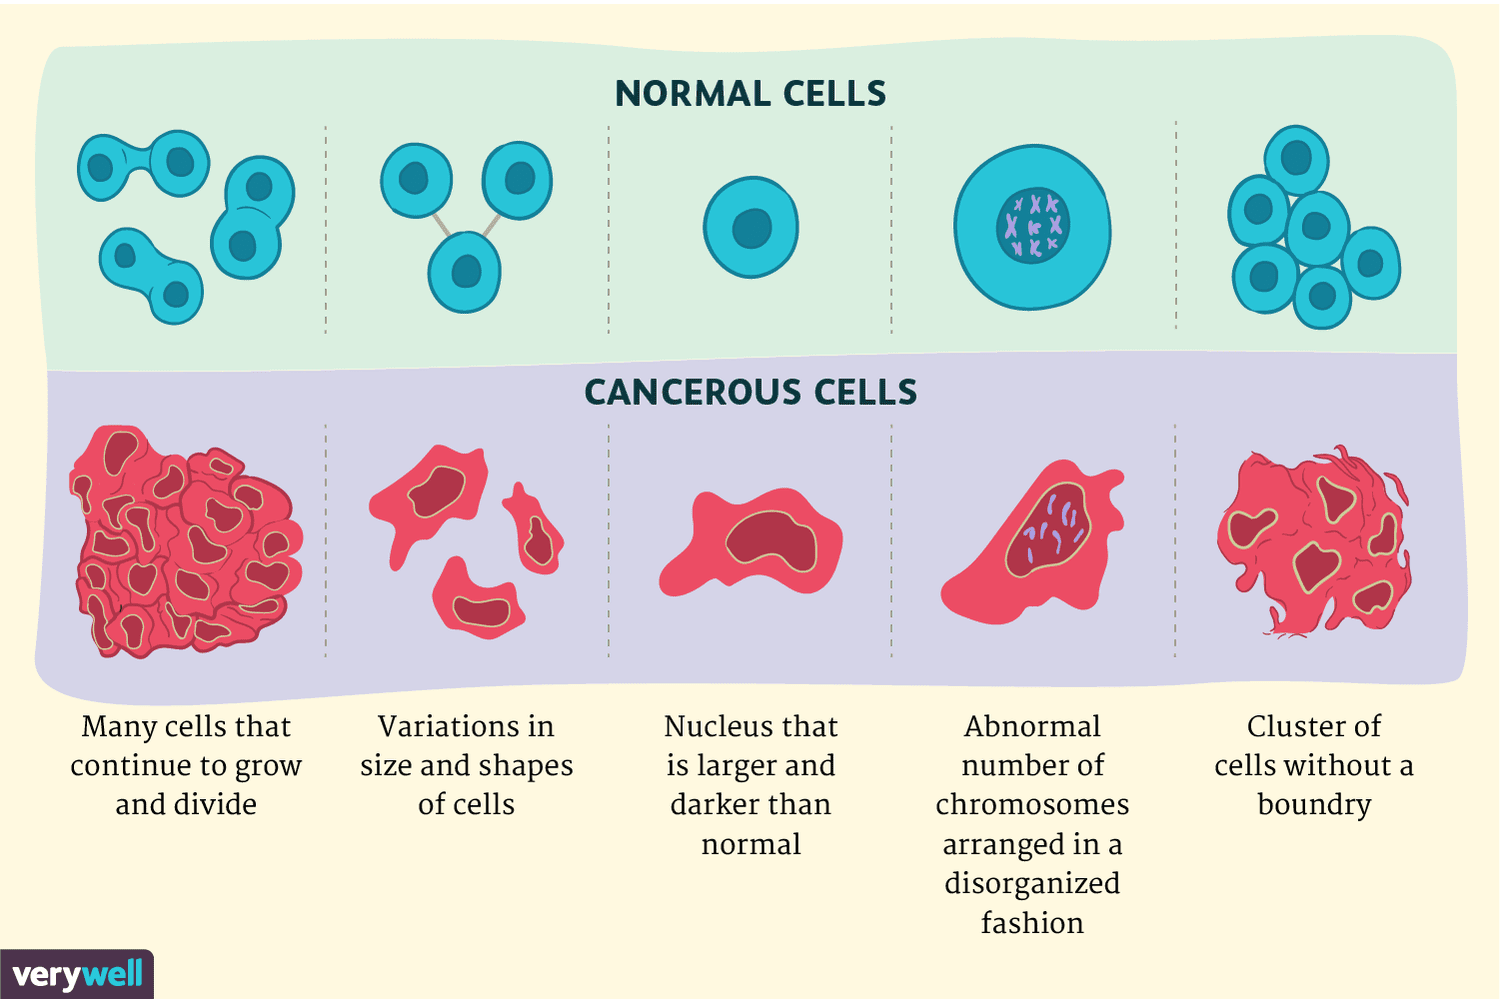
_Eldridge, L., MD (2023)_


Here, I present an analysis of breast cancer data to identify the characteristics of tumour cells indicative of a malignant diagnosis with a view to predicting the diagnosis of individual samples.

## About the Data

The data itself is derived from the Diagnostic Wisconsin Breast Cancer Database, made available by the UCI Machine Learning Repository and downloaded for the purposes of this project from Kaggle. This data comprises of values representing characteristics of cancer cells from individual samples. Each row represents a different sample. The values are computed from a digitised image of a fine needle aspirate (FNA) biopsy of a breast mass. The data thus describes characteristics of the cell nuclei in the digitised image.

Links:

Kaggle dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

UCI source: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## Data Exploration

First we need to import the packages and libraries we will be using and assign them aliases for ease of use. We will also read in the .csv file as a Pandas DataFrame and set the palette for the visualisation we will be making later.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(palette='Set2')
                    
df = pd.read_csv('Cancer_Data.csv')

To begin exploration we need to get an overview of the data and how it is structured. To do this, we will use the `.head()`, `.info()` and `.shape` methods.

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df.shape

(569, 33)

From our exploration, we can see that our dataset consists of 569 rows and 33 columns, including a column called `Unnamed: 32` added by Pandas when when it could not find a header in the original dataset. Each row has been given a unique `id`, and represents a sample for which a diagnosis has been given in the `diagnosis` column - either `B` or `M`, indicating respectively a benign or malignant mass.

The remaining columns describe features of the cell nuclei, including a **mean**, **standard error**, and **worst** value for each feature ('worst' appears to mean the largest value for each feature at any point in the image). The features described are:

* radius
* texture
* perimeter
* area
* smoothness
* compactness
* concavity
* concave points
* symmetry
* fractal

Metrics for the features were not given.

## Data cleaning

Firstly, we will get rid of any columns and rows not needed for our analysis. As we will not be using the **standard error** or the **worst** of each feature in our analysis, we can remove columns containing these values. The code below will drop the columns containing the standard error along with the `Unnamed: 32` column added when the .csv was read by Pandas:

In [16]:
columns_se = df.columns[df.columns.str.contains('se')]
columns_worst = df.columns[df.columns.str.contains('worst')]

df.drop(columns_se, axis=1, inplace=True)
df.drop(columns_worst, axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


We can see from using the `.info` method while exploring the data that all of the remaining columns have 569 rows containing non-null values out of the 569 total rows. We therefore do not need to remove NaN values as we know there are none in our data.

To make our data neater, however, we can rename column labels. The code below replaces any underscores with spaces and capitalises the column `id`, as well as the first letter of each row:

In [18]:
df.columns = df.columns.str.replace('_', ' ', regex=True)
df.columns = df.columns.str.capitalize()
df.rename(columns={'Id': 'ID'}, inplace=True) # Note that the .capitalize method has renamed 'id' to 'Id'
df

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,Symmetry mean,Fractal dimension mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


## Data Transformation, Analysis and Viualisation

Now that our data is cleaned, it's time to discover what general trends we can see from the data. First of all, I'd like to compare the mean values of each characteristic between malignant and benign diagnoses. To do this, we have to group all samples by `Diagnosis` and generate a mean value for each column describing a characteristic. The code below creates a new dataframe `mean_df` containing these values:

In [21]:
mean_df = df.groupby(['Diagnosis'])[['Radius mean', 'Texture mean', 'Perimeter mean', 'Area mean', 'Smoothness mean', 'Compactness mean', 'Concavity mean', 'Symmetry mean']].mean()
mean_df

,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Symmetry mean
Diagnosis,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.174186
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.192909


Just from the values above, we can see that the size of the values from the columns describing the size (radius, perimeter, area, etc.) and texture of the cell nuclei are much larger than the other columns, which would render them invisible if we were to include them together on a bar chart. For example:

<Axes: >

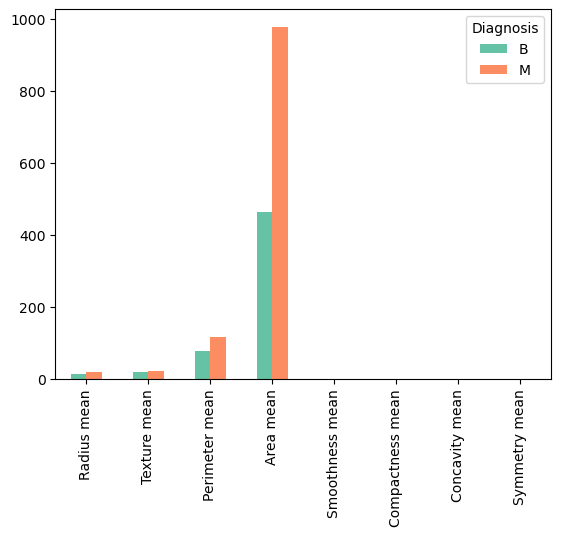

In [23]:
transpose_mean_df = mean_df.transpose() # Allows characteristics to be plotted along the x axis
transpose_mean_df.plot(kind='bar')

The values in column `Area mean` in particular are so large that it is impossible to see comparisons for the other columns. We can work around this by only including certain columns with a similar scale on our bar chart:

<Axes: >

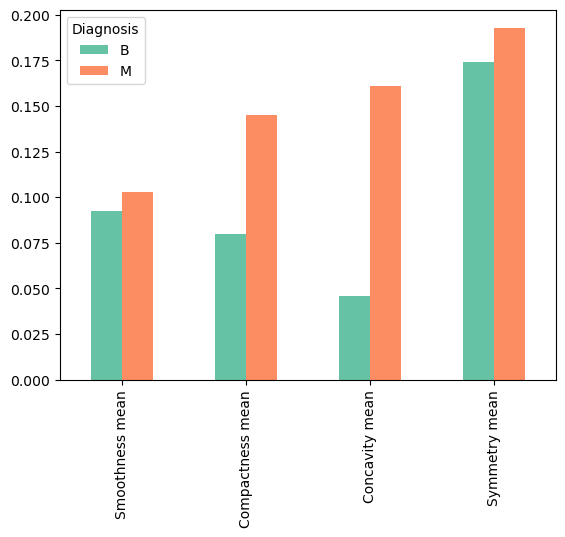

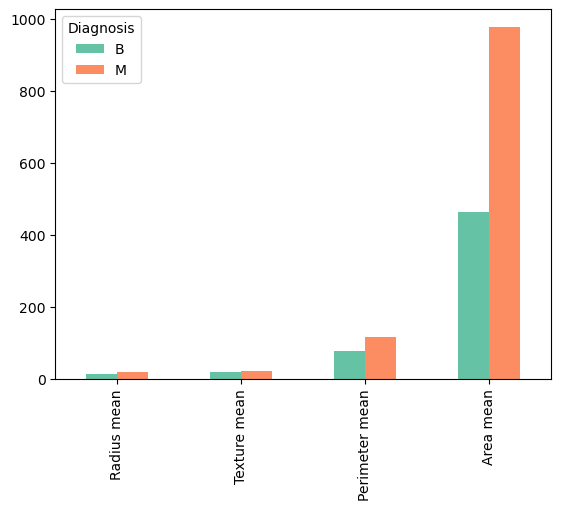

In [25]:
mean_df_size = mean_df.drop(columns=['Smoothness mean', 'Compactness mean', 'Concavity mean', 'Symmetry mean']) # Dropping columns
mean_df_nonsize = mean_df.drop(columns=['Perimeter mean', 'Radius mean', 'Texture mean', 'Area mean'])

tpose_mean_df_nonsize = mean_df_nonsize.transpose() # Transposing dataframes
tpose_mean_df_size = mean_df_size.transpose()

tpose_mean_df_nonsize.plot(kind='bar') # Plotting bar charts
tpose_mean_df_size.plot(kind='bar')

From these comparison charts we can already see that **malignant** diagnoses score higher across all variables. However, some variables show a more marked distinction than others between diagnoses; in particular, a higher value in the **area**, **compactness** and **concavity** of cell nuclei seems to be a strong indicator of a malignant diagnosis.

We can also determine the mean percentage increase of the characteristics of cell nuclei in malignant samples. The cell below shows the `mean_df` dataframe transformed using the method `.pct_change()`, showing the **percentage increase** between mean benign and mean malignant values.

In [27]:
percent_change = mean_df.pct_change()
percent_change = percent_change.mul(100, axis=1)
percent_change = percent_change.round(2)

percent_change

,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Symmetry mean
Diagnosis,,,,,,,,
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M,43.77,20.6,47.76,111.41,11.27,81.29,249.07,10.75


We can then plot these values on a bar chart. The code below drops the first row containing NaN values, renames the columns, transposes the dataframe and plots a horizontal bar chart.

<Axes: title={'center': 'Average increase in characteristics of malignant tumors vs benign'}, xlabel='Mean % increase', ylabel='Characteristic'>

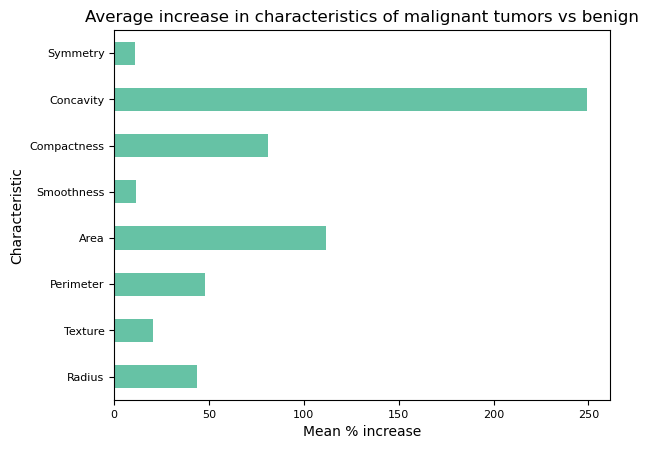

In [29]:
increase_plot = percent_change.drop('B')

increase_plot.rename(columns={'Symmetry mean' : 'Symmetry',
                      'Concavity mean' : 'Concavity',
                      'Compactness mean' : 'Compactness',
                      'Smoothness mean' : 'Smoothness',
                      'Area mean' : 'Area',
                      'Radius mean' : 'Radius',
                      'Texture mean' : 'Texture',
                      'Perimeter mean' : 'Perimeter'}, inplace=True)

increase_plot = increase_plot.transpose()

increase_plot.plot(kind='barh', xlabel='Mean % increase', ylabel='Characteristic', legend=False, title='Average increase in characteristics of malignant tumors vs benign', 
                   fontsize=8)

Again, the standout characteristics from this bar chart are concavity, compactness and area. These three features have the largest mean percentage increase in malignant samples when compared to benign samples. Two others follow shortly behind - **perimeter** and **radius** of the cell nuclei - however, these are size-based descriptors for which area is already a good and more encompassing proxy.

### Box plots
To get a closer look at these trends, we can use a different chart type, such as a box plot, to show patterns within each variable. The code in the cells below generates box plots for the variables identified above, using the `df` dataframe:

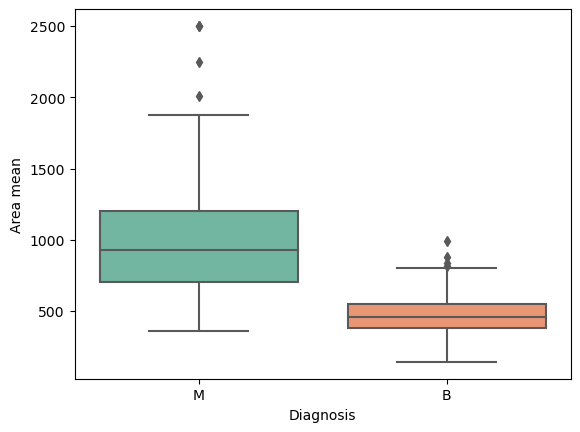

In [32]:
sns.boxplot(x='Diagnosis', 
            y='Area mean', 
            data=df
);

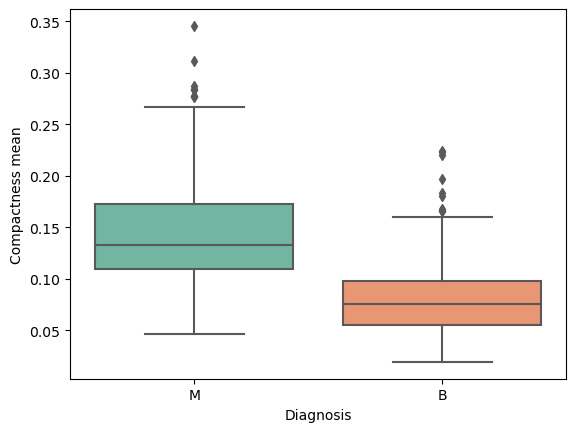

In [33]:
sns.boxplot(x='Diagnosis', 
            y='Compactness mean', 
            data=df
);

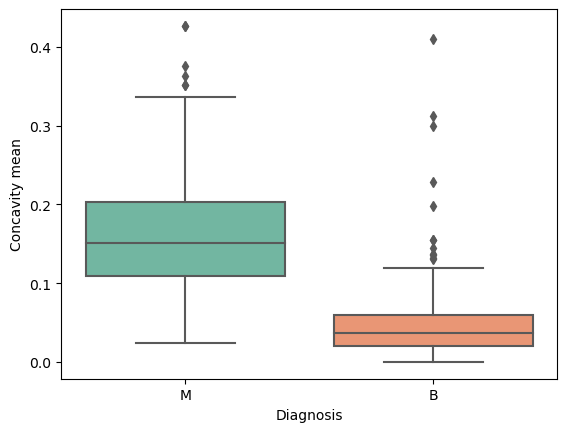

In [34]:
sns.boxplot(x='Diagnosis', 
            y='Concavity mean', 
            data=df
);

These box plots show that the values for the Area, Compactness and Concavity variables between malignant and benign samples are quite distinct. For example, the minimum value for malignant samples within each variable tends to lie at the beginning of the first quartile (Q1) of all benign samples. Further, the interquartile ranges (IQRs) of benign and malignant samples within each variable is completely separate; the IQR of malignant samples in each variable shown completely surpasses the benign IQR.

### Scattergraphs
I would also like to compare diagnoses by plotting samples on a scattergraph. The `.pairplot` method is a good way to explore trends between many variables at once and easily identify the most significant ones. However, they can take a lot of time and computing to produce, and it can be difficult to read so much information at once. The code below removes some of the variables identified by myself as less distinct and generates a `.pairplot` matrix for the remaining variables.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


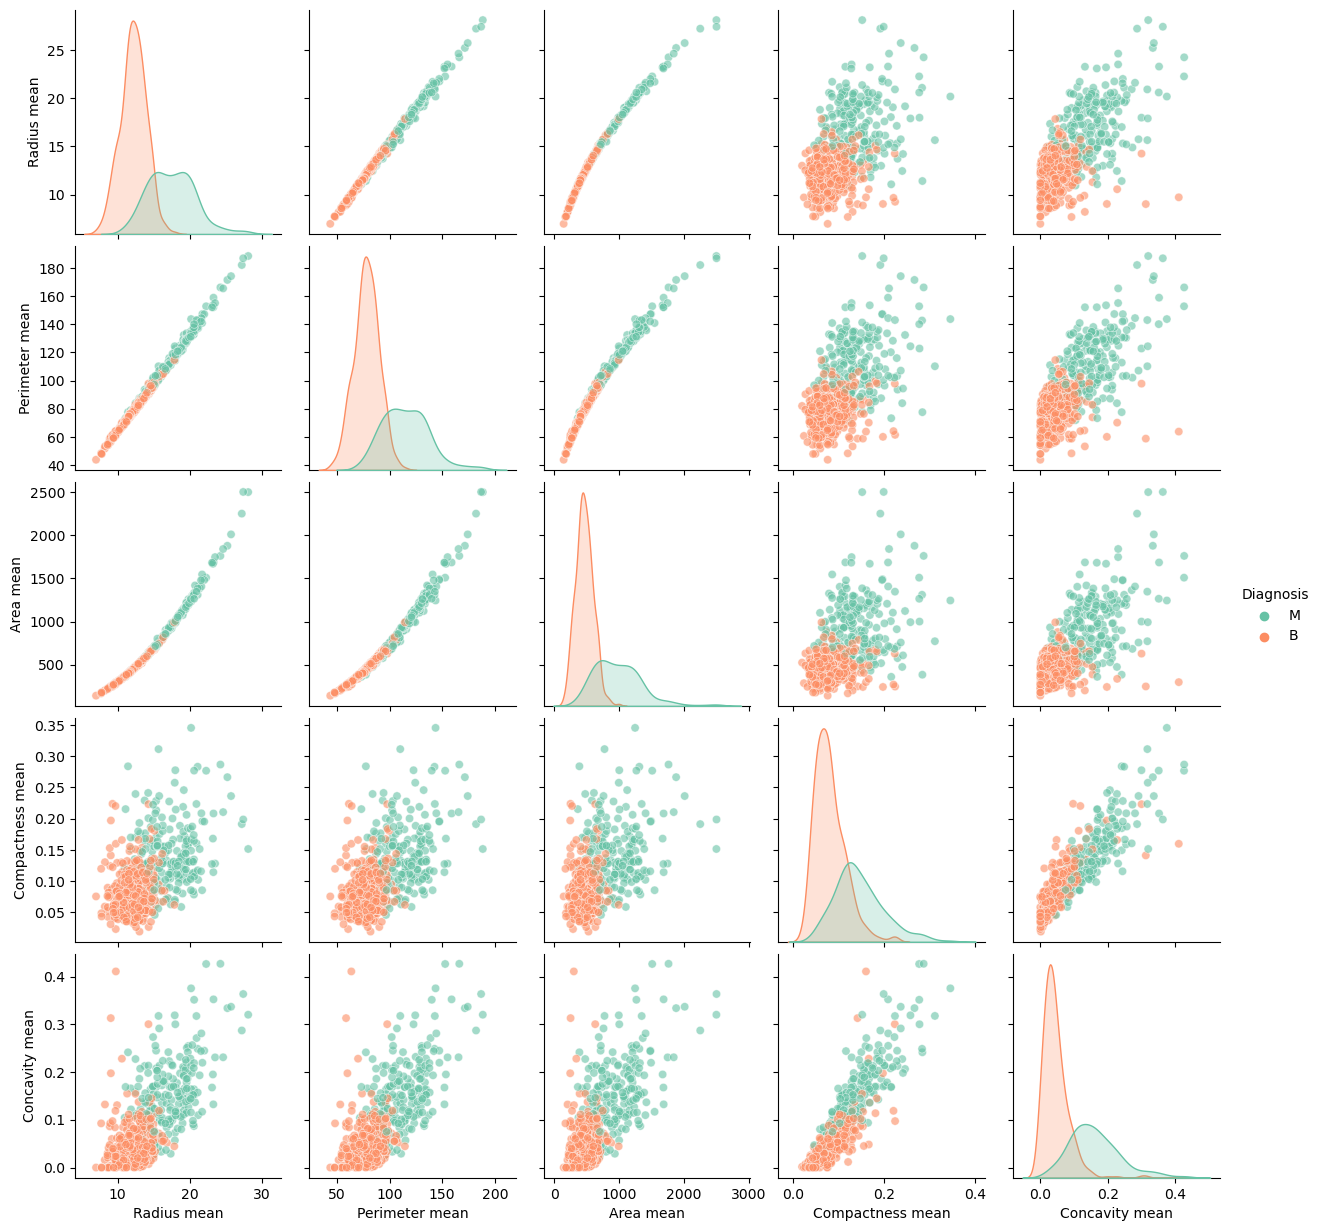

In [36]:
pairplot = df.drop(['ID', 'Texture mean', 'Symmetry mean', 'Smoothness mean', 'Fractal dimension mean', 'Concave points mean'], axis='columns') # Getting rid of variables with less distinctive results

sns.pairplot(data=pairplot, hue='Diagnosis', plot_kws=dict(alpha=0.6))

This `.pairplot` confirms that samples within each diagnosis are very distinct - often the samples from each subset barely overlap - no matter which features are being measured. An obvious point is the very strong positive correlation between characteristics describing size, showing that **area** can be used as an suitable proxy for **perimeter** and **radius**.

The single-variable plots show that for each characteristic the benign subset is more homogenous, whilst the malignant subset is more widely spread. This could imply that if we were to predict the diagnosis of samples based on their scores, the exclusion criteria might have to be quite low, lest a false negative (cancerous sample missed) result was returned.

Predicting whether individual samples are cancerous or not requires an assessment of probability. One method of assessing probability is by using a **logistic regression model**.

### Logistic Regression Models

Logistic regression is a tool that can be used to classify binary variables based on probability, and is often utilised in machine learning. The code below generates a logistic regression plot for the variable **area** and shows the probability of a benign or malignant diagnosis based on any given score:

[Text(0.5, 1.0, 'Logistic Regression of Area vs Diagnosis')]

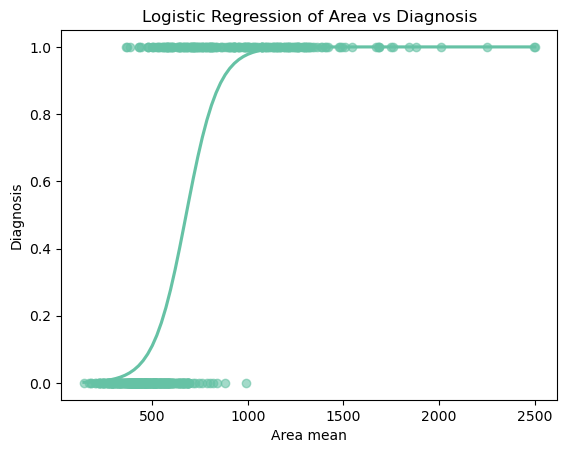

In [40]:
dic = {"B": 0, "M": 1} # First; replacing binary variable 'Diagnosis' with numerical data, or throws error
regression = df.copy()
regression.replace({"Diagnosis": dic}, inplace=True)

sns.regplot(data=regression, x='Area mean', y='Diagnosis', logistic=True, ci=None, scatter_kws={'alpha':0.6}).set(title='Logistic Regression of Area vs Diagnosis')

This model shows that, based on our data, a cell nucleus with an area of 1000 is nearly certainly malignant. If a sample has an area of approximately 650, they have around a 0.50 probability of being malignant - i.e. it is equally likely that this sample will be diagnosed benign as malignant. To predict whether a set of samples were likely to be cancerous, we could choose a probability - say, 0.80 - and produce a subset of samples with a malignancy probability of 0.80 or over. For our dataset, **samples with an area of approximately 750 or over have a 0.80 or higher probability of being diagnosed as malignant**. In a practical setting, a subset like this could be marked out for urgent investigation.

Before we move on to prediction, let's produce similar models for the variables identified as being strongly correlated with malignancy, **compactness** and **concavity**.

[Text(0.5, 1.0, 'Logistic Regression of Compactness vs Diagnosis')]

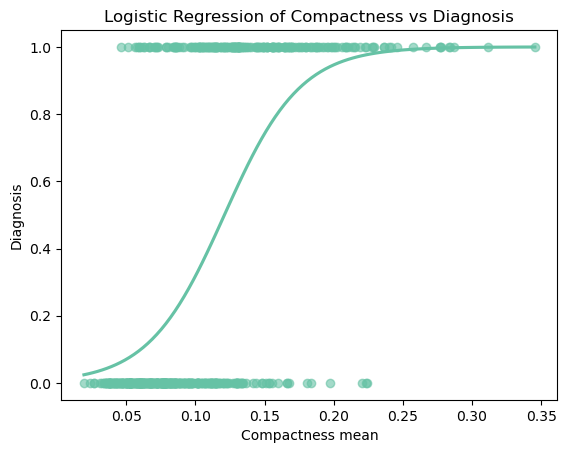

In [42]:
sns.regplot(data=regression, x='Compactness mean', y='Diagnosis', logistic=True, ci=None, scatter_kws={'alpha':0.6}).set(title='Logistic Regression of Compactness vs Diagnosis')

[Text(0.5, 1.0, 'Logistic Regression of Concavity vs Diagnosis')]

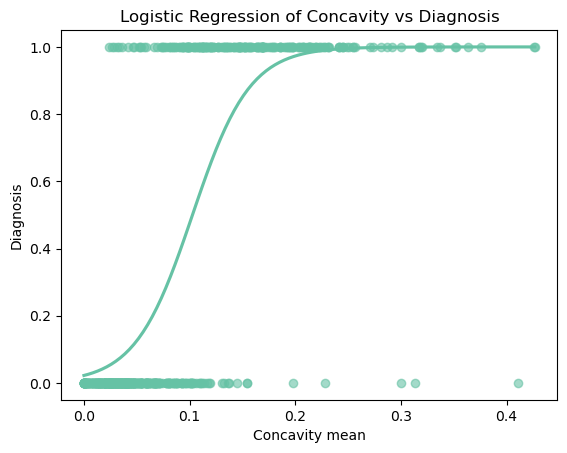

In [43]:
sns.regplot(data=regression, x='Concavity mean', y='Diagnosis', logistic=True, ci=None, scatter_kws={'alpha':0.6}).set(title='Logistic Regression of Concavity vs Diagnosis')

So, for the variable compactness a score of approximately **0.15 or more** gives an **0.80 or over** probability of a malignant diagnosis. For concavity, a 0.80 probability of malignancy is indicated by a score of approximately **0.14 or over**.

With this information we can create a function that returns the samples most likely to be cancerous. We can then assess what percentage of this subset have been diagnosed as malignant and whether this is an accurate tool for predicting which cells are cancerous or not.

### Predicting Malignancy

The code below defines the criteria set above for **area**, then applies a mask filtering samples with an `M` diagnosis to find the percentage of samples matching the criteria that are cancerous:

In [90]:
mask_area = df['Area mean'] >= 750 # Defining and applying value mask
area = df[mask_area]

mal_mask = area['Diagnosis'] == 'M' # Defining and applying 'M' mask
malper_area = area[mal_mask]

percent = len(malper_area) / len(area) * 100 # Finding what percentage of subset is malignant
percent

95.36423841059603

So, 95.36% of samples with an area of 750 or above are cancerous compared to 37.25% of the total dataset (212 malignant / 569 total * 100), suggesting that this is an accurate criteria for predicting malignancy. However, as the criteria was derived from the same samples we are testing it on this assessment of its accuracy may not be representative of its application to other datasets. It would therefore need further testing to ensure its usefulness.

We can also do the same for **compactness** and **concavity**:

In [88]:
mask_comp = df['Compactness mean'] >= 0.15
comp = df[mask_comp]

mal_mask = comp['Diagnosis'] == 'M'
malper_comp = comp[mal_mask]

percent = len(malper_comp) / len(comp) * 100
percent

85.85858585858585

In [86]:
mask_con = df['Concavity mean'] >= 0.14
con = df[mask_con]

mal_mask = con['Diagnosis'] == 'M'
malper_con = con[mal_mask]

percent = len(malper_con) / len(con) * 100
percent

93.7984496124031

Which reveals that both our criteria for **compactness** and **concavity** are reasonable predictors of malignancy, although compactness alone is less so.

Further, we can apply all masks at the same time and see what percentage of the remaining samples are cancerous:

In [49]:
mask_area = df['Area mean'] >= 750       # Defining and applying all masks
mask_comp = df['Compactness mean'] >= 0.15
mask_con = df['Concavity mean'] >= 0.14
masked_df = df[mask_con & mask_comp & mask_area]

mal_mask = masked_df['Diagnosis'] == 'M' # Applying 'M' mask
malper = masked_df[mal_mask]

percent = len(malper) / len(masked_df) * 100
percent

100.0

Our analysis shows that **100%** of the samples matching our criteria for area, compactness and concavity are cancerous. This is a higher percentage than when selective criteria is applied to a single variable, showing that the application of multiple criteria is more accurate than a single indicator, as expected.

### Creating a Function

Finally, we can **create a function** to apply these masks simultaneously and return a dataframe of samples most likely to be cancerous. Practically, this could be used to prioritise a subset of patients as urgent and ensure those patients most likely to have cancerous masses are diagnosed and treated as quickly as possible, whilst still ensuring all patients are assessed.

Below, I have designed a function, `diagnosis()`, that defines and applies the masks for the strongest indicators of malignancy as above. A new dataframe containing the most urgent samples is then returned:

In [110]:
def diagnosis(df):

    mask_area = df['Area mean'] >= 750
    mask_comp = df['Compactness mean'] >= 0.15
    mask_con = df['Concavity mean'] >= 0.14
    masked_df = df[mask_con & mask_comp & mask_area]

    return masked_df

In [112]:
diagnosis(df)

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,Symmetry mean,Fractal dimension mean
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.1599,0.1974,0.12790,0.2069,0.05999
12,846226,M,19.17,24.80,132.4,1123.0,0.09740,0.2458,0.2065,0.11180,0.2397,0.07800
17,84862001,M,16.13,20.68,108.1,798.8,0.11700,0.2022,0.1722,0.10280,0.2164,0.07356
25,852631,M,17.14,16.40,116.0,912.7,0.11860,0.2276,0.2229,0.14010,0.3040,0.07413
30,853401,M,18.63,25.11,124.8,1088.0,0.10640,0.1887,0.2319,0.12440,0.2183,0.06197
33,854002,M,19.27,26.47,127.9,1162.0,0.09401,0.1719,0.1657,0.07593,0.1853,0.06261
42,855625,M,19.07,24.81,128.3,1104.0,0.09081,0.2190,0.2107,0.09961,0.2310,0.06343
45,857010,M,18.65,17.60,123.7,1076.0,0.10990,0.1686,0.1974,0.10090,0.1907,0.06049
72,859717,M,17.20,24.52,114.2,929.4,0.10710,0.1830,0.1692,0.07944,0.1927,0.06487


What percentage of total malignant samples our function captures can also be calculated:

In [140]:
len(diagnosis(df)) / len(df[df['Diagnosis'] == 'M']) * 100

25.471698113207548

Showing that around 25% of cancer cells can be identified by this tool and those samples prioritised for diagnosis. Criteria can be adjusted to a lower or higher threshold depending on how many samples the user wants to prioritise.

## Conclusion

Breast cancer remains the most commonly diagnosed cancer worldwide and a leading cause of cancer deaths. Early diagnosis and treatment is key in improving prognosis and survival rates, particularly in countries with lower rates of access to standard treatment. In this project I inferred that certain features of sample cell nuclei, namely area, compactness and concavity, were strong indicators of malignancy. This was shown using statistical analysis and data visualisation, including bar, box and scatter plots. I then used logistic regression modeling to assess the probability of a malignant diagnosis based on a given value in one of these variables. Further, I created a function which returned the samples most likely to be cancerous based on criteria derived from these probability models.

A practical application of such a tool could be prioritisation of diagnosis of samples shown to have a high likelihood of malignancy, of course not precluding the assessment of all samples by a specialist. A weakness of this tool is that the same samples used to create the criteria were also used to test its accuracy, meaning that further testing of the tool on independent datasets would be required to reliably test its accuracy.

## References

Arnold, M., Morgan, E., Rumgay, H., Mafra, A., Singh, D., Laversanne, M., ... & Soerjomataram, I. (2022). Current and future burden of breast cancer: Global statistics for 2020 and 2040. The Breast, 66, 15-23.

Eldridge, L., MD. (2023). Cancer Cells vs. Normal Cells: How Are They Different? https://www.verywellhealth.com/cancer-cells-vs-normal-cells-2248794.

Fischer, E. G. (2020). Nuclear morphology and the biology of cancer cells. Acta cytologica, 64(6), 511-519.